<a href="https://colab.research.google.com/github/suryaWHJr/1/blob/main/Copy_of_data_story112.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Story
### To analyse if reminders to save increase savings.

\
**Note** - Some columns represent values in 0s and 1s. 0 is equivalent to False whereas 1 is equivalent to True.



In [1]:
#Importing the important modules

In [7]:
import pandas as pd
import statistics
import plotly.express as px

Now let's visualise the data to see if we can find anything?

In [8]:
#Uploading the csv
from google.colab import files
data_to_load = files.upload()

#Plotting the graph
df = pd.read_csv("savings_data_final.csv")
fig = px.scatter(df, y="quant_saved", color="rem_any")
fig.show()

Saving savings_data_final.csv to savings_data_final (1).csv


If we look at this data, we can see that the yellow dots are the ones who were given a reminder to save (**Since 1 stands for True**) while the blue dots are the ones who were not given a reminder to save.

\
We can also see that most of the outliers are the Blue dots, who have saved more than others.

\
Let's try to see how many people were given a reminder v/s the people who were not given a reminder.

In [10]:
import csv

with open('savings_data_final.csv', newline="") as f:
  reader = csv.reader(f)
  savings_data = list(reader)

savings_data.pop(0)

#Finding total number of people and number of people who were reminded
total_entries = len(savings_data)
total_people_given_reminder = 0
for data in savings_data:
  if int(data[3]) == 1:
    total_people_given_reminder += 1

import plotly.graph_objects as go

fig = go.Figure(go.Bar(x=["Reminded", "Not Reminded"], y=[total_people_given_reminder, (total_entries - total_people_given_reminder)]))

fig.show()

Here, we can see that about 8 thousand people were reminded, compared to about 5 thousand people who were not reminded to save.

Let's see what is the mean, median and mode of the savings made by people.

In [11]:
#Mean, median and mode of savings
all_savings = []
for data in savings_data:
  all_savings.append(float(data[0]))

print(f"Mean of savings - {statistics.mean(all_savings)}")
print(f"Median of savings - {statistics.median(all_savings)}")
print(f"Mode of savings - {statistics.mode(all_savings)}")

Mean of savings - 85.32780331328739
Median of savings - 39.2724
Mode of savings - 0.0


Now these are some very interesting results! Can you guess why the mean, median and the mode is not same and worlds apart?

\
If we go back and look at the scatterplot we plotted before, we can see that majority of the savings data lies between 0 to 100.

\
Now, since we have a few outliers, which are the blue dots that are away from the rest of the crowd, our mean has significantly increased from the median, since it is the sum of all values by total entries. Since the outliers lie far away from the crowd, the difference is huge.

\
Similarly, for mode, in our data, there are a lot of people who didn't save at all. Thus, the mode of the data is 0. Mode is the value with maximum occurences.

\
Let's see if we have a similar massive difference between the mean, median and mode of people who got reminded and people who didn't receive reminders.

In [ ]:
#Mean, median and mode of savings
reminded_savings = []
not_reminded_savings = []
for data in savings_data:
  if int(data[3]) == 1:
    reminded_savings.append(float(data[0]))
  else:
    not_reminded_savings.append(float(data[0]))

print("Results for people who were reminded to save")
print(f"Mean of savings - {statistics.mean(reminded_savings)}")
print(f"Median of savings - {statistics.median(reminded_savings)}")
print(f"Mode of savings - {statistics.mode(reminded_savings)}")
#To add new lines
print("\n\n")
print("Results for people who were not reminded to save")
print(f"Mean of savings - {statistics.mean(not_reminded_savings)}")
print(f"Median of savings - {statistics.median(not_reminded_savings)}")
print(f"Mode of savings - {statistics.mode(not_reminded_savings)}")

Results for people who were reminded to save
Mean of savings - 82.56940908263547
Median of savings - 39.2724
Mode of savings - 0.0



Results for people who were not reminded to save
Mean of savings - 89.67095185226523
Median of savings - 36.0475
Mode of savings - 0.0


Again, there seems to be massive differences between the mean, median and modes of savings of people who were both reminded and not reminded. We can conclude this with the same explaination as above.

\
Let's first calculate the standard deviation of the data.

In [ ]:
#Standard Deviation
print(f"Standard deviation of all the data -> {statistics.stdev(all_savings)}")
print(f"Standard deviation of people who were reminded -> {statistics.stdev(reminded_savings)}")
print(f"Standard deviation of people who were not reminded -> {statistics.stdev(not_reminded_savings)}")

Standard deviation of all the data -> 196.75453011909315
Standard deviation of people who were reminded -> 173.24866414440817
Standard deviation of people who were not reminded -> 228.875050299707


Here, we can see that the standard deviation varies a lot in all three types of data.

\
It is higher for the people who were not reminded v/s the people who were reminded.

\
Looking at the data up until now, we can assume that reminding people to save did not have a significant effect.

\
From standard deviations, we can see that the people who were not reminded have much more scattered data than people who were reminded. 

\
The question is, does this data have a correlation? Let's see if the savings are corellated to the age of people.

\
**Note** - The columns that have age as 0 will not be considered, since their age is missing. No one can be saving data at the age of 0

In [12]:
import numpy as np

age = []
savings = []
for data in savings_data:
  if float(data[5]) != 0:
    age.append(float(data[5]))
    savings.append(float(data[0]))

correlation = np.corrcoef(age, savings)
print(f"Correlation between the age of the person and their savings is - {correlation[0,1]}")


Correlation between the age of the person and their savings is - 0.03663447975985462


Here, we receive the correlation between the age and the savings to be 0.03, which means that the given data is not correlated.

\
Let's see if this given data for savings follow a bell curved normal distribution

In [ ]:
import plotly.figure_factory as ff

fig = ff.create_distplot([df["quant_saved"].tolist()], ["Savings"], show_hist=False)
fig.show()

It definitely does not follow a normal distribution. If we look at this data, we can see that majority of the data lies under 1000. The rest is just a very small number of data points.

\
Because of this, our chart is skewed to the left side. This means that majority of the data, instead of lying on the center, lies in the left side of the chart.

To deal with this, we can remove the outliers. There is a method known as the IQR (Interquartile Range) method. We will use this.

\
Let's first check the outliers -

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



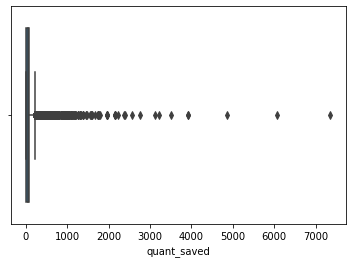

In [ ]:
import seaborn as sns

sns.boxplot(data=df, x=df["quant_saved"])

Here, we can see that the majority of the data is represented by a thick, long black line. We then have a thin long black line and finally we have a horizontal line, which is the rest of the data.

\
Here, the thin black vertical line is the line that seperates the data we should use to do our analysis. Let's remove the outliers first.

In [ ]:
q1 = df["quant_saved"].quantile(0.25)
q3 = df["quant_saved"].quantile(0.75)
iqr = q3-q1

print(f"Q1 - {q1}")
print(f"Q3 - {q3}")
print(f"IQR - {iqr}")

lower_whisker = q1 - 1.5*iqr
upper_whisker = q3 + 1.5*iqr

print(f"Lower Whisker - {lower_whisker}")
print(f"Upper Whisker - {upper_whisker}")

#Creating a new DataFrame
new_df = df[df["quant_saved"] < upper_whisker]

Q1 - 2.2840000000000003
Q3 - 86.514
IQR - 84.22999999999999
Lower Whisker - -124.06099999999998
Upper Whisker - 212.85899999999998


From here, we can say that anyone who saved roughly more than 213 is an outlier in this data.

\
Now that we've dealt with the outliers, let's see what our mean, median and modes are and also, if we have a normal distribution now. Let's also check the standard deviation now.

In [ ]:
#Mean, median and mode of savings
all_savings = new_df["quant_saved"].tolist()

print(f"Mean of savings - {statistics.mean(all_savings)}")
print(f"Median of savings - {statistics.median(all_savings)}")
print(f"Mode of savings - {statistics.mode(all_savings)}")
print(f"Standard deviation in savings - {statistics.stdev(all_savings)}")

fig = ff.create_distplot([new_df["quant_saved"].tolist()], ["Savings"], show_hist=False)
fig.show()

Mean of savings - 46.200519389818794
Median of savings - 36.0475
Mode of savings - 0.0
Standard deviation in savings - 50.866871917288634


Here, now our mean is much more closer to the median unlike before, and the mode still remains to be 0 since there are people in our dataset who haven't saved at all!

\
The standard deviation has also significantly reduced from before, but we still do not have a normal distribution curve.

\
To make this a normal distribution curve now, we can simply draw random samples from the population to create a sampling (normal distribution).

In [ ]:
#Collecting 1000 samples of 100 data points each, saving their averages in a list
import random

sampling_mean_list = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(all_savings))
  sampling_mean_list.append(statistics.mean(temp_list))

mean_sampling = statistics.mean(sampling_mean_list)

fig = ff.create_distplot([sampling_mean_list], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0, 0.1], mode="lines", name="MEAN"))
fig.show()

Here, we have a nice bell curve for normal distribution when doing the sampling. Let's also calculate the standard deviation of this normal sampling distribution

In [ ]:
print(f"Standard deviation of the sampling data - {statistics.stdev(sampling_mean_list)}")

Standard deviation of the sampling data - 5.091787150333248


As expected, this comes out to be roughly 1/10th of the standard deviation of the population.

\
Let's also compare the mean of the population and the sampling -

In [ ]:
print(f"Mean of Population - {statistics.mean(all_savings)}")
print(f"Mean of Sampling Distribution - {mean_sampling}")

Mean of Population - 46.200519389818794
Mean of Sampling Distribution - 45.99224013709402


Awesome, they come out to be exactly the same.

Let's do one final check, by trying to find the correlation between the age and the savings with the new data from which we have removed the outliers!

In [ ]:
#temp_df will have the rows where age is not 0
temp_df = new_df[new_df.age != 0]

age = temp_df["age"].tolist()
savings = temp_df["quant_saved"].tolist()

correlation = np.corrcoef(age, savings)
print(f"Correlation between the age of the person and their savings is - {correlation[0,1]}")

Correlation between the age of the person and their savings is - 0.08561544120342093


We still have a correlation of 0.085, which is not significant.

\
Now, let's get back to the real question. Does reminder have any impact on the savings of the people? How can we achieve this statistically?

\
With the **z-test**! We will take a sample from the people who were given reminders and see if that sample fits with the population of people who were not given reminders. If it fits in well, we can say that the reminders had no significant effect.

\
Let's start with first filtering out the data of people who were given notifications and those who weren't given notifications.

In [ ]:
reminded_df = new_df.loc[new_df["rem_any"] == 1]
not_reminded_df = new_df.loc[new_df["rem_any"] == 0]

print(reminded_df.head())
print(not_reminded_df.head())

   quant_saved  female  highschool_completed  rem_any  wealthy   age
0      13.0908       1                     0        1        0  28.0
1      39.2724       0                     1        1        1   0.0
3      58.9086       1                     1        1        1   0.0
4      78.5448       1                     1        1        1   0.0
5      39.2724       1                     1        1        1  43.0
    quant_saved  female  highschool_completed  rem_any  wealthy   age
11      39.2724       1                     1        0        1  26.0
12      58.9086       1                     1        0        1   0.0
14      78.5448       1                     1        0        0  32.0
31       2.2840       1                     1        0        1  29.0
34       2.2840       1                     1        0        1  28.0


Now, let's plot the distribution graph for the people who were not reminded to save and see if it follows a normal distribution.

In [ ]:
fig = ff.create_distplot([not_reminded_df["quant_saved"].tolist()], ["Savings (Not Reminded)"], show_hist=False)
fig.show()

Since this does not follow a normal distribution, we will take the sampling data and plot it. We will use this sampling data in our z-test.

In [ ]:
not_reminded_savings = not_reminded_df["quant_saved"].tolist()

sampling_mean_list_not_reminded = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(not_reminded_savings))
  sampling_mean_list_not_reminded.append(statistics.mean(temp_list))

mean_sampling_not_reminded = statistics.mean(sampling_mean_list_not_reminded)
stdev_sampling_not_reminded = statistics.stdev(sampling_mean_list_not_reminded)

print(f"Mean of Sampling (Not Reminded) -> {mean_sampling_not_reminded}")
print(f"Standard Deviation of Sampling (Not Reminded) -> {stdev_sampling_not_reminded}")
fig = ff.create_distplot([sampling_mean_list_not_reminded], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0, 0.1], mode="lines", name="MEAN"))
fig.show()

Mean of Sampling (Not Reminded) -> 43.79363006979631
Standard Deviation of Sampling (Not Reminded) -> 4.998539302693592


Now we have a resemblance of a normal distribution, and we also have the mean and the standard deviation of the sampling data for the people who were not notified to save.

\
Now, assuming that we started notifying people to see if there was an affect in people's saving, let's see how it turned out!

\
First, let's calculate the first, second and third standard deviations for our sampling distribution.

In [ ]:
first_std_deviation_start = mean_sampling_not_reminded-stdev_sampling_not_reminded
first_std_deviation_end = mean_sampling_not_reminded+stdev_sampling_not_reminded
print(f"First (start) - {first_std_deviation_start} and First (end) - {first_std_deviation_end}")

second_std_deviation_start = mean_sampling_not_reminded-(2*stdev_sampling_not_reminded)
second_std_deviation_end = mean_sampling_not_reminded+(2*stdev_sampling_not_reminded)
print(f"Second (start) - {second_std_deviation_start} and Second (end) - {second_std_deviation_end}")

third_std_deviation_start = mean_sampling_not_reminded-(3*stdev_sampling_not_reminded)
third_std_deviation_end = mean_sampling_not_reminded+(3*stdev_sampling_not_reminded)
print(f"Third (start) - {third_std_deviation_start} and Third (end) - {third_std_deviation_end}")

First (start) - 38.795090767102714 and First (end) - 48.7921693724899
Second (start) - 33.79655146440912 and Second (end) - 53.790708675183495
Third (start) - 28.798012161715533 and Third (end) - 58.78924797787708


Now that we have everything we need for our z-test, let's quickly take a sampling distribution of the people who were reminded for saving.

In [ ]:
reminded_savings = reminded_df["quant_saved"].tolist()

sampling_mean_list_reminded = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(reminded_savings))
  sampling_mean_list_reminded.append(statistics.mean(temp_list))

mean_sampling_reminded = statistics.mean(sampling_mean_list_reminded)
stdev_sampling_reminded = statistics.stdev(sampling_mean_list_reminded)

print(f"Mean of Sampling (Reminded) -> {mean_sampling_reminded}")
print(f"Standard Deviation of Sampling (Reminded) -> {stdev_sampling_reminded}")
fig = ff.create_distplot([sampling_mean_list_reminded], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0, 0.1], mode="lines", name="MEAN"))
fig.show()

Mean of Sampling (Reminded) -> 47.71121101865382
Standard Deviation of Sampling (Reminded) -> 4.91807596219437


Now we have the mean of sampling distribution of people who were given reminders and people who were not given reminders. We also have the standard deviation of the people who were not given reminders.

\
Let's see how significantly did reminders impact savings.

In [ ]:
z_score = (mean_sampling_reminded - mean_sampling_not_reminded) / stdev_sampling_not_reminded
print(f"Z-Score is - {z_score}")

Z-Score is - 0.7837451526581821


# Conclusion

\
Given all the analysis that we have done, we saw that there was not much difference between the people who got reminded about saving v/s people who were not reminded of saving.

\
With our Z-Score test, we confirmed that there is not much difference. The Z-Score is around 0.8; it is only when the Z-Score is greater than 2 that we consider the change as significant. Although people who were reminded had a little increase in savings, there's still no significant impact.

\
We also saw that there was no direct correlation between the age of the people and the money that they save.

\
### Next
Given all this, we also have some more data about people attending high school, if they're wealthy and about their gender.

\
1. Do women save more than men?
2. Do wealthy men save more than the poor ones?
3. Do people with higher education save more than those who have not completed high school?

\
Try to find the answers for the following questions and see if you can find anything interesting!

In [13]:
import pandas as pd

#Creating the dataframe
df = pd.DataFrame({"A":[1,5,3,4,2],
                   "B":[3,2,4,3,4],
                   "C":[2,2,7,3,4],
                   "D":[4,3,6,12,7]
                   })

#using quantile() function
#Find the quantiles over the index axis
df.quantile([.1,.25,.5,.75],axis = 0)


,A,B,C,D
0.10,1.4,2.4,2.0,3.4
0.25,2.0,3.0,2.0,4.0
0.50,3.0,3.0,3.0,6.0
0.75,4.0,4.0,4.0,7.0
